In [2]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [3]:
from google.colab import drive
import sys

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
test_path='/content/drive/MyDrive/IITB/test_sets'
models_dir = "/content/drive/MyDrive/IITB/project/models"
data_path='/content/drive/MyDrive/IITB/project/data'

In [5]:
!pip install shap

In [6]:
import pandas as pd
import numpy as np
import pickle
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, roc_auc_score, roc_curve
)
import shap
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
#Load your test data (X_test, y_test) – prepared this during training
X_test = np.load(test_path+"/X_test.npy", allow_pickle=True)      # or however you saved your arrays
y_test = np.load(test_path+"/y_test.npy", allow_pickle=True)

In [8]:
#Load a trained model (example: Random Forest allfeatures)
import joblib

model_path = models_dir + "/rf_allfeatures.pkl"  # your path
rf_all = joblib.load(model_path)

In [9]:
# Predictions
y_pred = rf_all.predict(X_test)

In [10]:
#Accuracy & Macro metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Macro Precision:", precision_score(y_test, y_pred, average='macro'))
print("Macro Recall:", recall_score(y_test, y_pred, average='macro'))
print("Macro F1:", f1_score(y_test, y_pred, average='macro'))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6137931034482759
Macro Precision: 0.27522220426632193
Macro Recall: 0.28639597342955553
Macro F1: 0.2791985632731687

Classification Report:
               precision    recall  f1-score   support

     CORRECT       0.73      0.78      0.76       208
   INCORRECT       0.27      0.22      0.24        67
        SKIP       0.10      0.14      0.12         7
     Unknown       0.00      0.00      0.00         8

    accuracy                           0.61       290
   macro avg       0.28      0.29      0.28       290
weighted avg       0.59      0.61      0.60       290



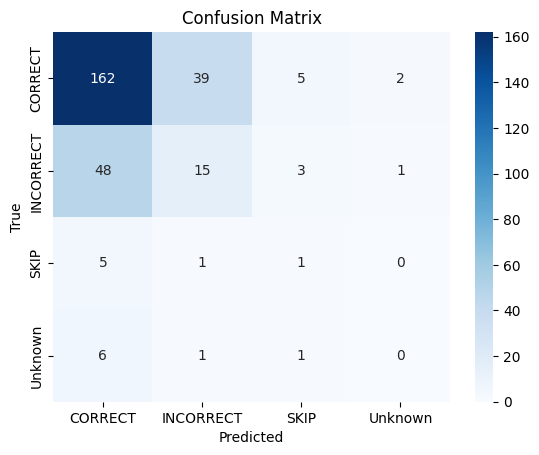

In [11]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test), cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [12]:
#ROC-AUC (only if binary classification)
if len(np.unique(y_test)) == 2:
    y_prob = rf_all.predict_proba(X_test)[:,1]
    auc = roc_auc_score(y_test, y_prob)
    print("ROC-AUC:", auc)
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"AUC={auc:.2f}")
    plt.plot([0,1],[0,1],'k--')
    plt.xlabel("FPR"); plt.ylabel("TPR"); plt.legend(); plt.title("ROC Curve")
    plt.show()

In [13]:
feature_cols = ['delta_mean','delta_std','theta_mean','theta_std','alpha_mean','alpha_std',
 'beta_mean','beta_std','gamma_mean','gamma_std','alpha_asymmetry',
 'Anger_mean','Anger_std','Anger_max','Contempt_mean','Contempt_std','Contempt_max',
 'Disgust_mean','Disgust_std','Disgust_max','Fear_mean','Fear_std','Fear_max','Joy_mean','Joy_std','Joy_max',
 'Sadness_mean','Sadness_std','Sadness_max','Surprise_mean','Surprise_std','Surprise_max',
 'Engagement_mean','Engagement_std','Engagement_max','Valence_mean','Valence_std','Valence_max',
 'Sentimentality_mean','Sentimentality_std','Sentimentality_max','Confusion_mean','Confusion_std','Confusion_max',
 'Neutral_mean','Neutral_std','Neutral_max','Attention_mean','Attention_std','Attention_max',
 'Brow Furrow_mean','Brow Furrow_occurrence','Brow Raise_mean','Brow Raise_occurrence','Cheek Raise_mean','Cheek Raise_occurrence',
 'Chin Raise_mean','Chin Raise_occurrence','Dimpler_mean','Dimpler_occurrence','Eye Closure_mean','Eye Closure_occurrence',
 'Eye Widen_mean','Eye Widen_occurrence','Inner Brow Raise_mean','Inner Brow Raise_occurrence','Jaw Drop_mean','Jaw Drop_occurrence',
 'Lip Corner Depressor_mean','Lip Corner Depressor_occurrence','Lip Press_mean','Lip Press_occurrence','Lip Pucker_mean','Lip Pucker_occurrence',
 'Lip Stretch_mean','Lip Stretch_occurrence','Lip Suck_mean','Lip Suck_occurrence','Lid Tighten_mean','Lid Tighten_occurrence',
 'Mouth Open_mean','Mouth Open_occurrence','Nose Wrinkle_mean','Nose Wrinkle_occurrence','Smile_mean','Smile_occurrence',
 'Smirk_mean','Smirk_occurrence','Upper Lip Raise_mean','Upper Lip Raise_occurrence','Blink_mean','Blink_occurrence',
 'BlinkRate_mean','BlinkRate_occurrence','Pitch_mean','Pitch_occurrence','Yaw_mean','Yaw_occurrence','Roll_mean','Roll_occurrence',
 'Interocular Distance_mean','Interocular Distance_occurrence']




/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:4779: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:4779: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:4779: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:4779: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


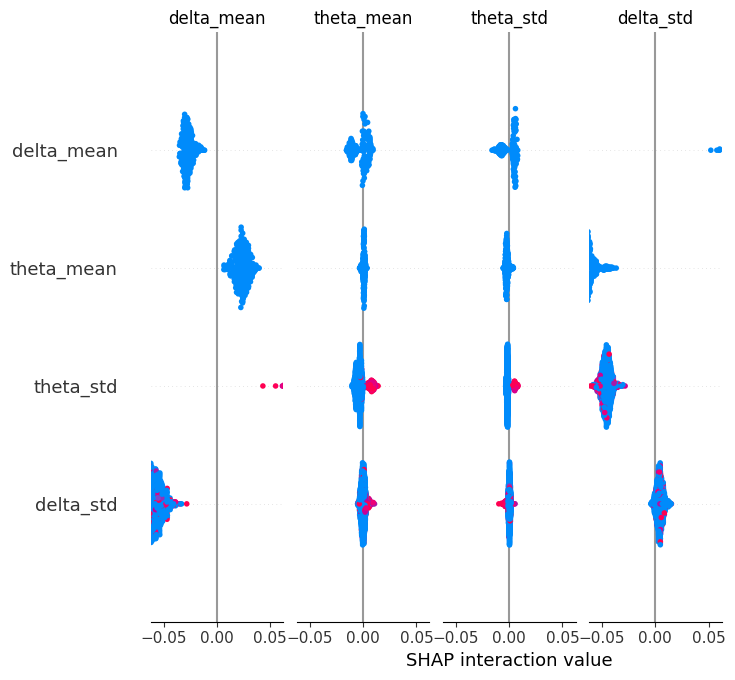

In [14]:

#SHAP Feature Importance (tree models work well)
df_features = pd.read_csv(data_path+"/df_features_trials.csv")

X = df_features[feature_cols].fillna(0)

explainer = shap.TreeExplainer(rf_all)  #
shap_values = explainer.shap_values(X, check_additivity=False)

# summary plot
shap.summary_plot(shap_values, X, feature_names=feature_cols)

ROC-AUC for CORRECT vs others: 0.571


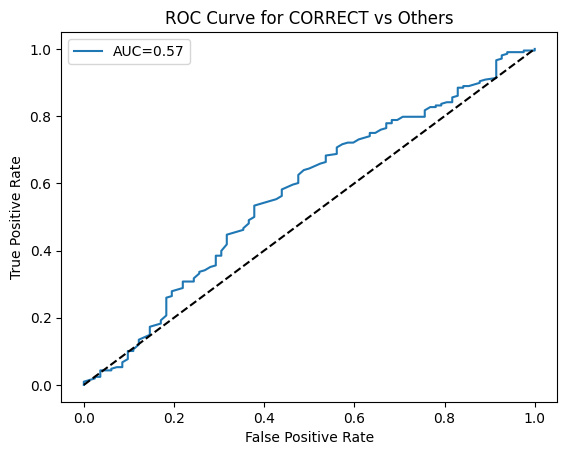

In [15]:
# Calculate ROC-AUC for 'CORRECT' vs others
if 'CORRECT' in np.unique(y_test):
    # Create a binary target: 1 for 'CORRECT', 0 for others
    binary_y = (y_test == 'CORRECT').astype(int)

    # Get the probability of the 'CORRECT' class
    # Ensure the order of classes from the model matches the probabilities
    correct_class_index = list(rf_all.classes_).index('CORRECT')
    binary_proba = rf_all.predict_proba(X_test)[:, correct_class_index]

    # Calculate AUC
    auc = roc_auc_score(binary_y, binary_proba)
    print(f"ROC-AUC for CORRECT vs others: {auc:.3f}")

    # Plot ROC curve
    fpr, tpr, _ = roc_curve(binary_y, binary_proba)
    plt.figure()
    plt.plot(fpr, tpr, label=f'AUC={auc:.2f}')
    plt.plot([0,1],[0,1],'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for CORRECT vs Others')
    plt.legend()
    plt.show()
else:
    print("The 'CORRECT' class is not present in the test data.")

In [16]:
# Per-class analysis
unique_classes, counts = np.unique(y_test, return_counts=True)
for cls in unique_classes:
    idx = (y_test == cls)
    acc_cls = accuracy_score(y_test[idx], y_pred[idx])
    print(f"Class {cls}: samples={counts[list(unique_classes).index(cls)]}, acc={acc_cls:.3f}")

Class CORRECT: samples=208, acc=0.779
Class INCORRECT: samples=67, acc=0.224
Class SKIP: samples=7, acc=0.143
Class Unknown: samples=8, acc=0.000


In [17]:
# Analyze confusion matrix for most confused classes
# The confusion matrix 'cm' was generated in cell T7fQjPlfiU0d
# The unique classes 'unique_classes' were obtained in cell 9cT4hAtbjAZ4

print("\nAnalyzing Confusion Matrix for most confused classes:")

# Iterate through the confusion matrix to find off-diagonal elements
confused_pairs = []
for i in range(len(unique_classes)):
    for j in range(len(unique_classes)):
        if i != j: # Look at off-diagonal elements (misclassifications)
            misclassified_count = cm[i, j]
            if misclassified_count > 0:
                true_class = unique_classes[i]
                predicted_class = unique_classes[j]
                confused_pairs.append({
                    'True Class': true_class,
                    'Predicted Class': predicted_class,
                    'Count': misclassified_count
                })

# Sort confused pairs by count in descending order
confused_pairs_sorted = sorted(confused_pairs, key=lambda x: x['Count'], reverse=True)

# Print the most confused pairs
if confused_pairs_sorted:
    print("Most frequent misclassifications:")
    for pair in confused_pairs_sorted:
        print(f"  True Class: {pair['True Class']}, Predicted Class: {pair['Predicted Class']}, Count: {pair['Count']}")
else:
    print("No misclassifications found (perfect classification).")


Analyzing Confusion Matrix for most confused classes:
Most frequent misclassifications:
  True Class: INCORRECT, Predicted Class: CORRECT, Count: 48
  True Class: CORRECT, Predicted Class: INCORRECT, Count: 39
  True Class: Unknown, Predicted Class: CORRECT, Count: 6
  True Class: CORRECT, Predicted Class: SKIP, Count: 5
  True Class: SKIP, Predicted Class: CORRECT, Count: 5
  True Class: INCORRECT, Predicted Class: SKIP, Count: 3
  True Class: CORRECT, Predicted Class: Unknown, Count: 2
  True Class: INCORRECT, Predicted Class: Unknown, Count: 1
  True Class: SKIP, Predicted Class: INCORRECT, Count: 1
  True Class: Unknown, Predicted Class: INCORRECT, Count: 1
  True Class: Unknown, Predicted Class: SKIP, Count: 1


ROC-AUC for INCORRECT vs others: 0.553


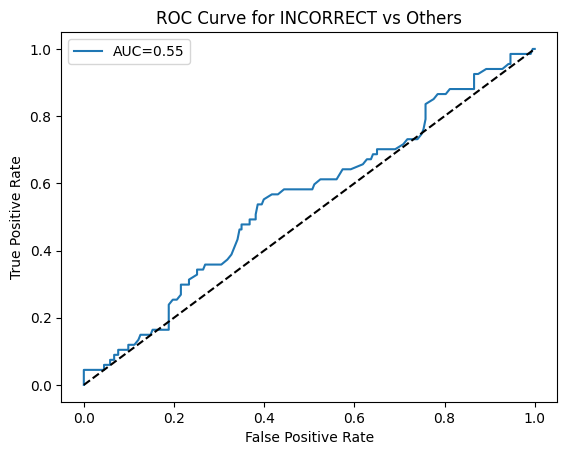

In [18]:
# Calculate ROC-AUC for 'INCORRECT' vs others
if 'INCORRECT' in np.unique(y_test):
    # Create a binary target: 1 for 'INCORRECT', 0 for others
    binary_y_incorrect = (y_test == 'INCORRECT').astype(int)

    # Get the probability of the 'INCORRECT' class
    # Ensure the order of classes from the model matches the probabilities
    incorrect_class_index = list(rf_all.classes_).index('INCORRECT')
    binary_proba_incorrect = rf_all.predict_proba(X_test)[:, incorrect_class_index]

    # Calculate AUC
    auc_incorrect = roc_auc_score(binary_y_incorrect, binary_proba_incorrect)
    print(f"ROC-AUC for INCORRECT vs others: {auc_incorrect:.3f}")

    # Plot ROC curve
    fpr_incorrect, tpr_incorrect, _ = roc_curve(binary_y_incorrect, binary_proba_incorrect)
    plt.figure()
    plt.plot(fpr_incorrect, tpr_incorrect, label=f'AUC={auc_incorrect:.2f}')
    plt.plot([0,1],[0,1],'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for INCORRECT vs Others')
    plt.legend()
    plt.show()
else:
    print("The 'INCORRECT' class is not present in the test data.")

In [19]:
import numpy as np

def smooth_predictions(predictions, classes, window=3):
    """majority vote smoothing over sliding window"""
    # Map string predictions to integer indices
    class_to_int = {cls: i for i, cls in enumerate(classes)}
    predictions_int = np.array([class_to_int[p] for p in predictions])

    smoothed_int = []
    for i in range(len(predictions_int)):
        start = max(0, i - window//2)
        end = min(len(predictions_int), i + window//2 + 1)
        vals = predictions_int[start:end]
        # Check if the slice is empty before calling bincount
        if vals.size > 0:
            smoothed_int.append(np.bincount(vals).argmax())
        else:
            # Handle empty slice case, maybe append a placeholder or the original value
            # For simplicity, we'll append the original value's index in this case
            smoothed_int.append(predictions_int[i])


    # Map integer indices back to string labels
    int_to_class = {i: cls for cls, i in class_to_int.items()}
    smoothed_predictions = np.array([int_to_class[i] for i in smoothed_int])

    return smoothed_predictions

y_pred = rf_all.predict(X_test)
y_pred_smoothed = smooth_predictions(y_pred, rf_all.classes_, window=5)

print("Accuracy smoothed:", accuracy_score(y_test, y_pred_smoothed))

Accuracy smoothed: 0.7


In [21]:
df_features.columns

Index(['Key', 'Category', 'QuestionNumber', 'matchOrnomatch', 'Difficulty',
       'verdict', 'ResponseTime', 'routineStart', 'routineStamp', 'routineEnd',
       ...
       'BlinkRate_mean', 'BlinkRate_occurrence', 'Pitch_mean',
       'Pitch_occurrence', 'Yaw_mean', 'Yaw_occurrence', 'Roll_mean',
       'Roll_occurrence', 'Interocular Distance_mean',
       'Interocular Distance_occurrence'],
      dtype='object', length=115)